In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler


In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
(1797, 64)

(1797, 64)


(1797, 64)

In [5]:
X = digits.data
y = digits.target


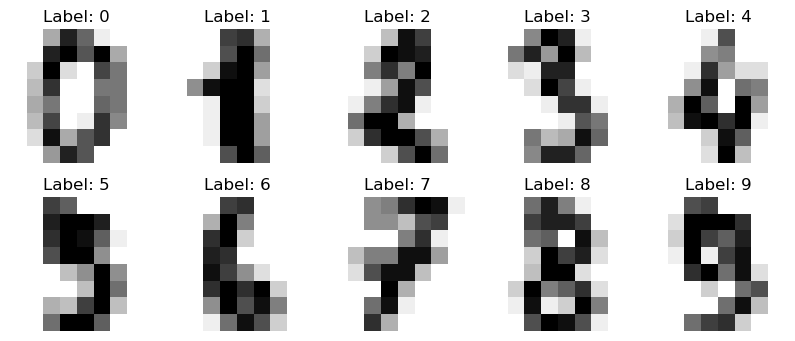

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()

In [9]:
if np.max(X) > 1:
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
else:
    X_normalized = X

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)# DUDA
silhouette_score(X, kmeans.fit_predict(X))


c:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.7020937832636733

In [11]:
from sklearn.metrics import  davies_bouldin_score

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

silhouette = silhouette_score(X_normalized, clusters)
davies_bouldin = davies_bouldin_score(X_normalized, clusters)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


c:\Users\prisc\anaconda3\envs\iteso\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.18125643255576387
Davies-Bouldin Index: 1.9295938516088103


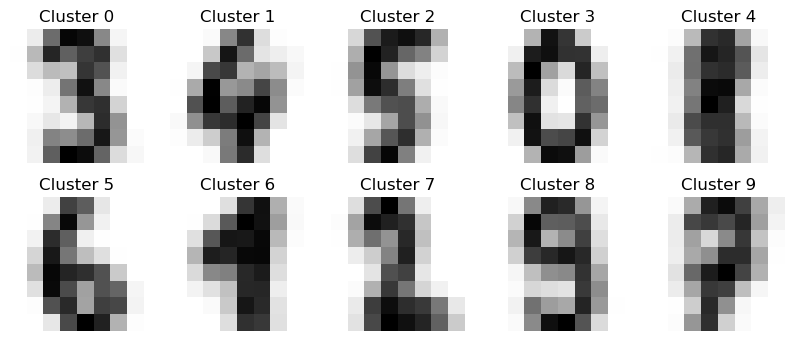

In [12]:
centroids = kmeans.cluster_centers_

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    centroid = centroids[i]
    centroid_image = centroid.reshape(8, 8)  
    ax.imshow(centroid_image, cmap='binary')
    ax.set_title(f'Cluster {i}')
    ax.axis('off')

plt.show()


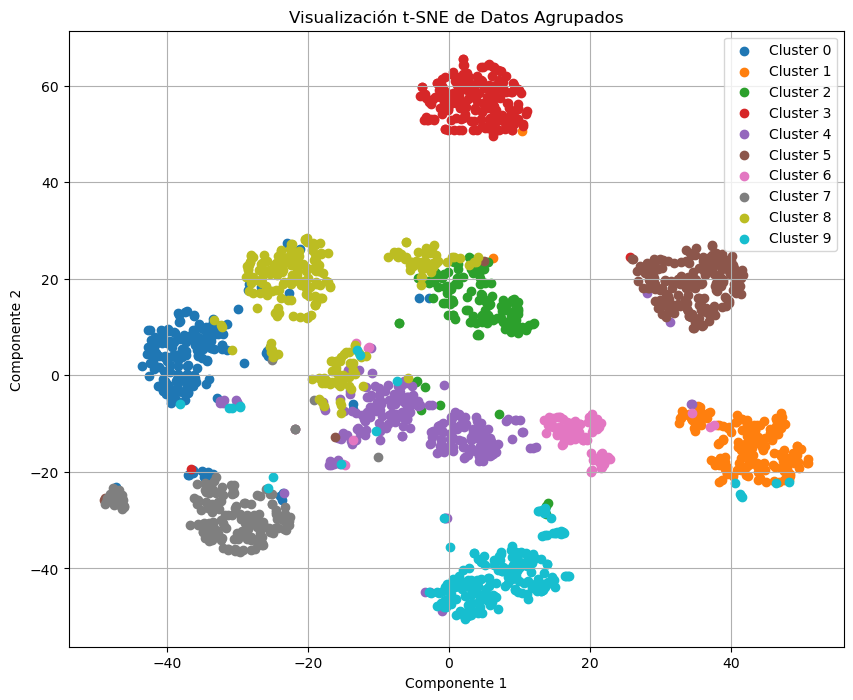

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

plt.figure(figsize=(10, 8))
for cluster in np.unique(clusters):
    plt.scatter(X_tsne[clusters == cluster, 0], X_tsne[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.title('Visualización t-SNE de Datos Agrupados')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()



Al visualizar y examinar los resultados se puede observar claramente la división de las agrupaciones muy claras, ya que en su mayoría estan distribuidas con sus respectos grupos, dejando a un lado los datos atípicos.
Entre los dígitos agrupados en su mayoría la distribución son bastante balanceadas, me refiero en que los datos son proporcionales entre ellos. 

La gran ventaja de usar k-Means y t-SNE son en que nos facilita la separación y división de datos al agruparlos por similitudes de características, por otro lado al poder ver los datos de una manera tan sencilla de observar ayuda a la comprensión rápida de los datos que quieres mostrar 